# Importación BBDD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import dask.dataframe as dd

In [2]:
ruta_archivo = '/Users/sandradiaz/Documents/CaptstoneProject/dades/2022/BicingNou_ESTACIONS/2022_03_Marc_BicingNou_ESTACIONS.csv'

dataset = pd.read_csv(ruta_archivo)


# Análisis dataset

In [3]:
dataset.head(2)

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,last_updated,ttl
0,1,16,14,2,29,1646089166,True,IN_SERVICE,1,1,1,NaN,1646089189,11
1,2,24,22,2,5,1646089055,True,IN_SERVICE,1,1,1,NaN,1646089189,11


In [4]:
dataset.columns

Index(['station_id', 'num_bikes_available',
       'num_bikes_available_types.mechanical',
       'num_bikes_available_types.ebike', 'num_docks_available',
       'last_reported', 'is_charging_station', 'status', 'is_installed',
       'is_renting', 'is_returning', 'traffic', 'last_updated', 'ttl'],
      dtype='object')

In [5]:
dataset.shape

(4535987, 14)

In [6]:
for columna in dataset.columns:
    hay_nan = dataset[columna].isna().any()
    if hay_nan:
        print(f"Hay NaN en la columna '{columna}'")
    else:
        print(f"No hay NaN en la columna '{columna}'")

No hay NaN en la columna 'station_id'
No hay NaN en la columna 'num_bikes_available'
No hay NaN en la columna 'num_bikes_available_types.mechanical'
No hay NaN en la columna 'num_bikes_available_types.ebike'
No hay NaN en la columna 'num_docks_available'
No hay NaN en la columna 'last_reported'
No hay NaN en la columna 'is_charging_station'
No hay NaN en la columna 'status'
No hay NaN en la columna 'is_installed'
No hay NaN en la columna 'is_renting'
No hay NaN en la columna 'is_returning'
Hay NaN en la columna 'traffic'
No hay NaN en la columna 'last_updated'
No hay NaN en la columna 'ttl'


In [7]:
for columna in dataset.columns:
    hay_0 = dataset[columna].isna().any()
    if (dataset[columna] == 0).any():
        print(f"La columna {columna} contiene al menos un cero.")
    else:
        print(f"La columna {columna} no contiene ceros.")

La columna station_id no contiene ceros.
La columna num_bikes_available contiene al menos un cero.
La columna num_bikes_available_types.mechanical contiene al menos un cero.
La columna num_bikes_available_types.ebike contiene al menos un cero.
La columna num_docks_available contiene al menos un cero.
La columna last_reported no contiene ceros.
La columna is_charging_station no contiene ceros.
La columna status no contiene ceros.
La columna is_installed contiene al menos un cero.
La columna is_renting contiene al menos un cero.
La columna is_returning contiene al menos un cero.
La columna traffic no contiene ceros.
La columna last_updated no contiene ceros.
La columna ttl contiene al menos un cero.


## - Station ID

In [8]:
station_id = dataset.groupby('station_id')
station_id = station_id['station_id'].unique()
print(station_id)

station_id
1        [1]
2        [2]
3        [3]
4        [4]
5        [5]
       ...  
515    [515]
516    [516]
517    [517]
518    [518]
519    [519]
Name: station_id, Length: 509, dtype: object


In [9]:
dataset['traffic'].isna()
dataset['traffic'].isna().sum()

4535987

## - Num bikes available

In [10]:
(dataset['num_bikes_available'] == 0).any().sum()

1

In [11]:
#Definimos la función 'bar_plot'
def bar_plot(df, column, xlabel, ylabel, title): #parámetros que utilizaremos, no variables
    
    plt.bar(*np.unique(df[column],return_counts = True)) #Definimos las dos variables (https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-94.php)
    #plt.bar(*np.unique(df[trip_distance],return_counts = True))
    
    plt.xlabel(xlabel) #Añadir etiquetas eje X
    plt.ylabel(ylabel) #Añadir etiquetas eje Y
    plt.title(title) #Añadir título
    plt.xticks(YEARS) #cambiar la etqiueta del eje X
    
    # raise NotImplementedError #Warning o error que salta cuando se llega a esta línea. Cuando tengamos la solución, lo eliminamos.

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4535987,) and arg 1 with shape (4535987, 14).

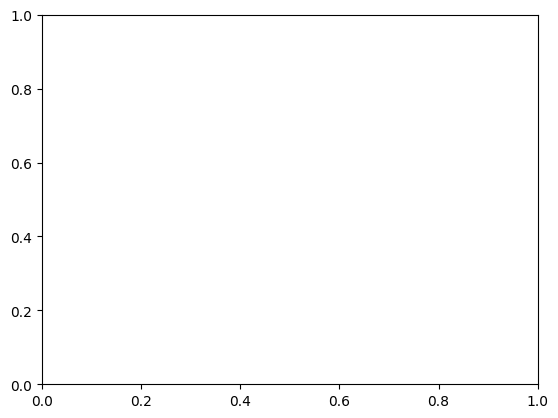

In [16]:
plot_num_bikes(dataset,dataset['num_bikes_available'])

# Data cleaning

In [13]:
dataset = dataset.drop(dataset.columns['traffic'],axis=1)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices